# Data mining - Target Audience


# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mno
import seaborn as sns
sns.set(style="ticks")

from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures 
from sklearn.svm import LinearSVC

from sklearn.cluster import KMeans

## Load Data

In [2]:
main_df = pd.read_csv('sales_data.csv')

# Data Frame

In [53]:
main_df.head()

,index,flag,gender,house_val,online,marriage,child,mortgage,house_owner,car_prob,...,age_3_<=35,age_4_<=45,age_5_<=55,age_6_<=65,age_7_>65,education_0. <HS,education_1. HS,education_2. Some College,education_3. Bach,education_4. Grad
0,0,N,F,213171,N,NaN,NaN,1Low,Owner,3,...,0,0,0,0,1,0,0,0,1,0
1,1,N,M,111147,Y,NaN,Y,1Low,Owner,1,...,0,0,0,0,0,0,0,1,0,0
2,2,Y,M,354151,Y,Single,NaN,1Low,NaN,2,...,0,0,0,0,0,0,0,1,0,0
3,3,Y,F,248694,Y,Married,N,2Med,Owner,1,...,0,0,0,1,0,0,0,0,1,0
4,4,N,F,416925,Y,Married,Y,1Low,Owner,2,...,0,0,1,0,0,0,0,0,1,0


###### Discribe features:
gender: Gender of the customer

education: Education background of customer

house_val: Value of the residence the customer lives in

age: Age of the customer by group

online: Whether the customer had online shopping experience or not

customer_psy: Variable describing consumer psychology based on the area of residence

marriage: Marriage status of the customer

children: Whether the customer has children or not

occupation: Career information of the customer

mortgage: Housing Loan Information of customers

house_own: Whether the customer owns a house or not

region: Information on the area in which the customer are located

car_prob: The probability that the customer will buy a new car(1 means the maximum possible）

fam_income: Family income Information of the customer(A means the lowest, and L means the highest)

###### Shape of dataframe

In [4]:
main_df.shape

(40000, 15)

In [5]:
main_df.dtypes

flag            object
gender          object
education       object
house_val        int64
age             object
online          object
customer_psy    object
marriage        object
child           object
occupation      object
mortgage        object
house_owner     object
region          object
car_prob         int64
fam_income      object
dtype: object

## Data Frame Unique Values

In [6]:
for cat in main_df.columns:
    print(cat, main_df[cat].unique())

flag ['Y' 'N']
gender ['M' 'F' 'U']
education ['4. Grad' '3. Bach' '2. Some College' '1. HS' '0. <HS' nan]
house_val [756460 213171 111147 ... 120630 603554 213596]
age ['1_Unk' '7_>65' '2_<=25' '6_<=65' '5_<=55' '4_<=45' '3_<=35']
online ['N' 'Y']
customer_psy ['B' 'E' 'C' 'J' 'A' 'G' 'F' 'I' 'D' 'H' 'U']
marriage [nan 'Single' 'Married']
child ['U' 'Y' 'N' '0']
occupation ['Professional' 'Sales/Service' 'Blue Collar' 'Others' 'Retired' 'Farm']
mortgage ['1Low' '2Med' '3High']
house_owner [nan 'Owner' 'Renter']
region ['Midwest' 'Northeast' 'West' 'South' 'Rest']
car_prob [1 3 2 7 5 6 9 8 4 0]
fam_income ['L' 'G' 'J' 'H' 'C' 'I' 'D' 'E' 'A' 'F' 'B' 'K' 'U']


## Raplace undefined characters with NaN

In [7]:
main_df['gender'] = main_df.gender.replace('U', np.NaN)
main_df['age'] = main_df.age.replace('1_Unk', np.NaN)
main_df['child'] = main_df.child.replace('U', np.NaN)
main_df['child'] = main_df.child.replace('0', np.NaN)

## Number and percentage of missing values

Null distribiution in each category

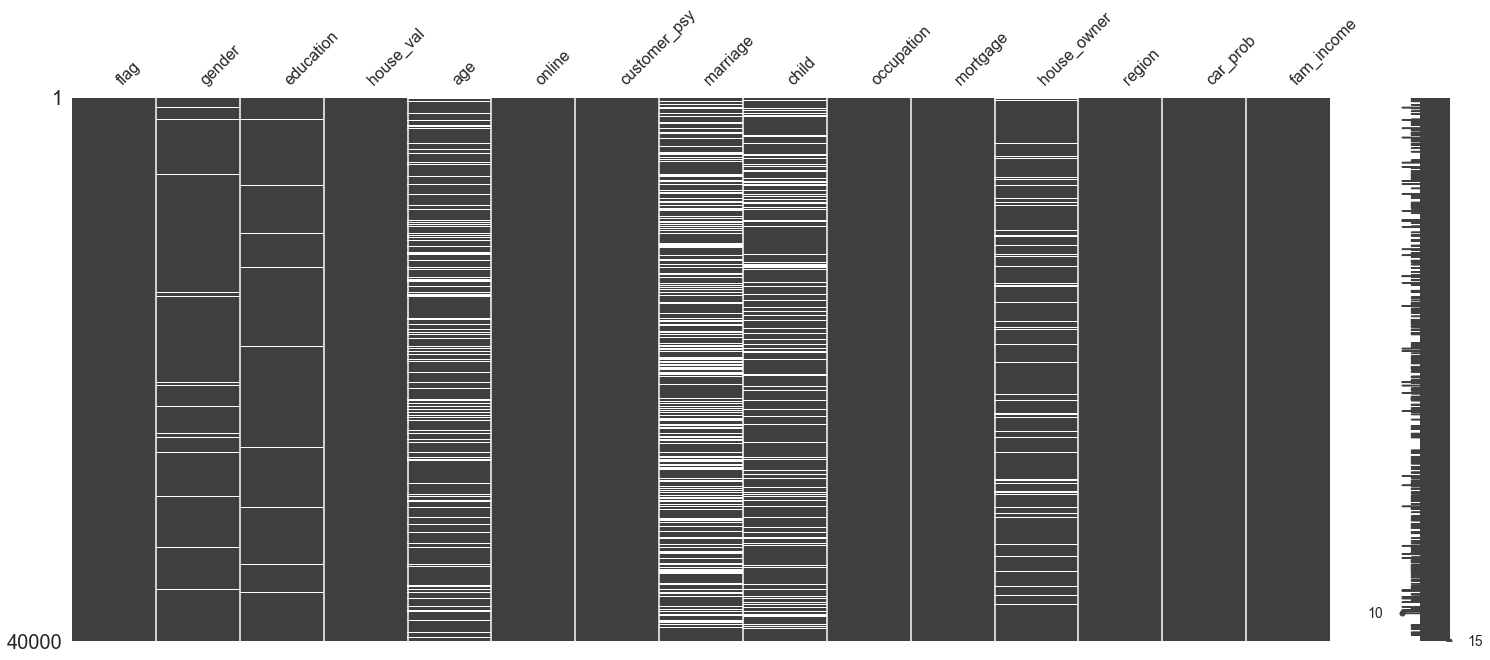

In [8]:
#Visualize null data in array
mno.matrix(main_df)

 Visualize some of features:

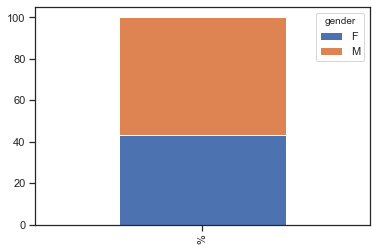

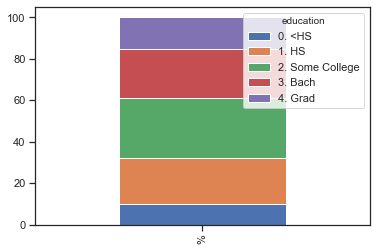

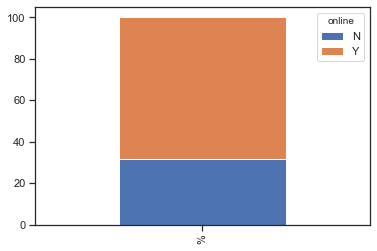

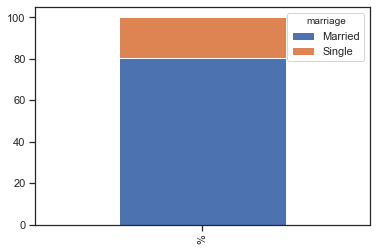

In [9]:
def category_stackedbar(df, category):
    '''Returns stacked bar plot'''
    return pd.DataFrame(
        df.groupby(category).count()['flag'] / df.groupby(category).count()['flag'].sum() * 100).rename(columns={"flag": "%"}).T.plot(
            kind='bar', 
            stacked=True
    );

category_stackedbar(main_df, 'gender');
category_stackedbar(main_df, 'education');
category_stackedbar(main_df, 'online');
category_stackedbar(main_df, 'marriage');

Number of unknown values for each feature

In [10]:
main_df.isnull().sum()

flag                0
gender           1151
education         741
house_val           0
age              6709
online              0
customer_psy        0
marriage        14027
child            8655
occupation          0
mortgage            0
house_owner      3377
region              0
car_prob            0
fam_income          0
dtype: int64

Proportion of unknown values for each feature

In [11]:
main_df.isnull().sum() / main_df.shape[0] * 100

flag             0.0000
gender           2.8775
education        1.8525
house_val        0.0000
age             16.7725
online           0.0000
customer_psy     0.0000
marriage        35.0675
child           21.6375
occupation       0.0000
mortgage         0.0000
house_owner      8.4425
region           0.0000
car_prob         0.0000
fam_income       0.0000
dtype: float64

در بالا نمونه داده ها و تعداد و توزیع مقادیر نامشخص را بررسی کردیم. در ادامه به دو شیوه مختلف به تعامل با این داده های نامشخص خواهیم پرداخت.
در نمونه اول از احتمالات برای پیشبینی مقادیر استفاده می کنیم
و در نمونه دوم با استفاده از روش خوشه بندی مقادیر نامشخص را پیشبینی می کنیم
و در انتها مدل ها را بر روی هر یک از مجموعه داده های به دست آمده اجرا می کنیم و نتایج را بررسی می کنیم.
بدین منظور ابتدا یک کپی از داده های اصلی برای استفاده در روش اول نگهداری می کنیم

# First Approach
### Copy Main Dataframe to another one for preprocessing

In [12]:
temp_df = main_df.copy()

In [13]:
temp_df.shape

(40000, 15)

### Fill education and gender missing values with imputer (most frequent strategy)

با توجه به این که ویژگی های تحصیلات و جنسیت کم ترین تعداد مقادیر نامشخص را دارند، این مقادیر نامشخص را با پرتکرار ترین مقدار هر ویژگی جایگزین می کنیم

In [14]:
imp = SimpleImputer(strategy='most_frequent')
temp_df['education'] = imp.fit_transform(temp_df[['education']]).ravel()
temp_df['gender'] = imp.fit_transform(temp_df[['gender']]).ravel()

In [15]:
temp_df.isnull().sum() / temp_df.shape[0] * 100

flag             0.0000
gender           0.0000
education        0.0000
house_val        0.0000
age             16.7725
online           0.0000
customer_psy     0.0000
marriage        35.0675
child           21.6375
occupation       0.0000
mortgage         0.0000
house_owner      8.4425
region           0.0000
car_prob         0.0000
fam_income       0.0000
dtype: float64

### Fill missing values with prob (for house_owner, marriage and child)

به دلیل این که ویژگی های زیر درصد بیشتری از مقادیر نامشخص را شامل می شوند برای پیشبینی مقادیر آنها از احتمال مقدار مثبت آن استفاده می کنیم. (خانه داشتن، ازدواج کرده، دارای فرزند) (تمام این سه ویژگی دو مقداری هستند)

In [16]:
def fillna_with_prob(category, df, attr1, attr2):
    prob = len(df[df[category] == attr1]) / ( len(df[df[category] == attr1]) + len(df[df[category] == attr2]) ) 
    df[category].fillna(value=prob, inplace = True)
    return df

In [17]:
temp_df = fillna_with_prob('house_owner',temp_df, 'Owner','Renter')
temp_df = fillna_with_prob('marriage',temp_df, 'Married','Single')
temp_df = fillna_with_prob('child',temp_df, 'Y','N')

In [18]:
temp_df.shape

(40000, 15)

In [19]:
temp_df.isnull().sum() / temp_df.shape[0] * 100

flag             0.0000
gender           0.0000
education        0.0000
house_val        0.0000
age             16.7725
online           0.0000
customer_psy     0.0000
marriage         0.0000
child            0.0000
occupation       0.0000
mortgage         0.0000
house_owner      0.0000
region           0.0000
car_prob         0.0000
fam_income       0.0000
dtype: float64

با توجه به این که توزیع مقادیر ویژگی سن تقریبا در مقادیر مختلف یکسان است و توزیع غالب ندارد و با توجه به تعداد نسبتا کم رکورد های دارای مقدار نامشخص سن، تصمیم به حذف این رکورد ها گرفتیم (رکورد های دارای مقادیر نامشخص ویژگی سن)

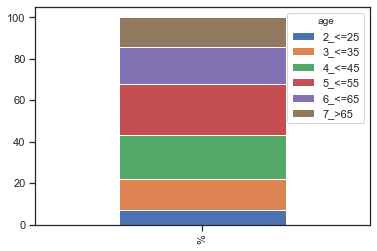

In [20]:
category_stackedbar(temp_df, 'age');

In [21]:
temp_df = temp_df.dropna(subset=['age'])
temp_df.reset_index(drop=True, inplace=True)
temp_df=temp_df.reset_index()

main_df = main_df.dropna(subset=['age'])
main_df.reset_index(drop=True, inplace=True)
main_df=main_df.reset_index()

In [22]:
temp_df.shape

(33291, 16)

In [23]:
main_df.shape

(33291, 16)

In [24]:
temp_df

,index,flag,gender,education,house_val,age,online,customer_psy,marriage,child,occupation,mortgage,house_owner,region,car_prob,fam_income
0,0,N,F,3. Bach,213171,7_>65,N,E,0.804335,0.574637,Professional,1Low,Owner,Northeast,3,G
1,1,N,M,2. Some College,111147,2_<=25,Y,C,0.804335,Y,Professional,1Low,Owner,Midwest,1,J
2,2,Y,M,2. Some College,354151,2_<=25,Y,B,Single,0.574637,Sales/Service,1Low,0.798187,West,2,L
3,3,Y,F,3. Bach,248694,6_<=65,Y,B,Married,N,Professional,2Med,Owner,West,1,G
4,4,N,F,3. Bach,416925,5_<=55,Y,C,Married,Y,Professional,1Low,Owner,South,2,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33286,33286,Y,F,3. Bach,0,7_>65,Y,C,0.804335,0.574637,Retired,1Low,0.798187,South,3,F
33287,33287,N,F,1. HS,213596,4_<=45,N,I,Married,0.574637,Blue Collar,1Low,Owner,South,1,D
33288,33288,Y,M,0. <HS,134070,3_<=35,Y,F,Married,0.574637,Sales/Service,1Low,Owner,Midwest,4,E
33289,33289,N,M,1. HS,402210,7_>65,Y,E,0.804335,Y,Sales/Service,1Low,0.798187,West,2,B


تمام مقادیر نامشخص به نوعی جایگزین یا حذف شدند

In [25]:
temp_df.isnull().sum() / temp_df.shape[0] * 100

index           0.0
flag            0.0
gender          0.0
education       0.0
house_val       0.0
age             0.0
online          0.0
customer_psy    0.0
marriage        0.0
child           0.0
occupation      0.0
mortgage        0.0
house_owner     0.0
region          0.0
car_prob        0.0
fam_income      0.0
dtype: float64

In [26]:
temp_df

,index,flag,gender,education,house_val,age,online,customer_psy,marriage,child,occupation,mortgage,house_owner,region,car_prob,fam_income
0,0,N,F,3. Bach,213171,7_>65,N,E,0.804335,0.574637,Professional,1Low,Owner,Northeast,3,G
1,1,N,M,2. Some College,111147,2_<=25,Y,C,0.804335,Y,Professional,1Low,Owner,Midwest,1,J
2,2,Y,M,2. Some College,354151,2_<=25,Y,B,Single,0.574637,Sales/Service,1Low,0.798187,West,2,L
3,3,Y,F,3. Bach,248694,6_<=65,Y,B,Married,N,Professional,2Med,Owner,West,1,G
4,4,N,F,3. Bach,416925,5_<=55,Y,C,Married,Y,Professional,1Low,Owner,South,2,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33286,33286,Y,F,3. Bach,0,7_>65,Y,C,0.804335,0.574637,Retired,1Low,0.798187,South,3,F
33287,33287,N,F,1. HS,213596,4_<=45,N,I,Married,0.574637,Blue Collar,1Low,Owner,South,1,D
33288,33288,Y,M,0. <HS,134070,3_<=35,Y,F,Married,0.574637,Sales/Service,1Low,Owner,Midwest,4,E
33289,33289,N,M,1. HS,402210,7_>65,Y,E,0.804335,Y,Sales/Service,1Low,0.798187,West,2,B


In [27]:
temp_df.dtypes

index            int64
flag            object
gender          object
education       object
house_val        int64
age             object
online          object
customer_psy    object
marriage        object
child           object
occupation      object
mortgage        object
house_owner     object
region          object
car_prob         int64
fam_income      object
dtype: object

In [28]:
temp_df.shape

(33291, 16)

برای اجرای مدل ها بر روی داده ها باید داده های غیر عددی به داده های عددی تبدیل شوند. مقادیر هر یک از ویژگی های گسسته را به عددی نسبت دادیم

## Convert to Number

In [29]:
main_df = main_df.drop('customer_psy', axis=1)
temp_df = temp_df.drop('customer_psy', axis=1)

dict_fam_income_label = {}
for i, char in enumerate(sorted(temp_df['fam_income'].unique().tolist())):
    dict_fam_income_label[char] = i + 1
temp_df['fam_income'] = temp_df['fam_income'].apply(lambda value: dict_fam_income_label[value])

temp_df['house_val'] = temp_df['house_val'].apply(lambda value: int(value))
temp_df['car_prob'] = temp_df['car_prob'].apply(lambda value: int(value))
temp_df['mortgage'] = temp_df['mortgage'].apply(lambda value: int(value[0]))
temp_df['education'] = temp_df['education'].apply(lambda value: int(value[0]) + 1)
temp_df['flag'] = temp_df['flag'].apply(lambda value: 1 if value == 'Y' else 0)
temp_df['online'] = temp_df['online'].apply(lambda value: 1 if value == 'Y' else 0)
temp_df['age'] = temp_df['age'].apply(lambda value: value[0:1])

temp_df['gender'] = temp_df['gender'].apply(lambda value: 1 if value == 'M' else 0 if value == 'F' else value)
temp_df['marriage'] = temp_df['marriage'].apply(lambda value: 1 if value == 'Married' else 0 if value == 'Single' else value)
temp_df['child'] = temp_df['child'].apply(lambda value: 1 if value == 'Y' else 0 if value == 'N' else value)
temp_df['house_owner'] = temp_df['house_owner'].apply(lambda value: 1 if value == 'Owner' else 0 if value == 'Renter' else value)


هر یک از مقادیر یکتای ویژگی های چند مقداری زیر را با روشی که در ادامه قابل مشاهده است به یک ویژگی باینری جدید تبدیل می کنیم

### Considering 'occupation', 'region', 'education' and 'age' attribiutes as dummy features:

In [30]:
def apply_dummy(df, cat, drop_first):
    return pd.concat([df, pd.get_dummies(df[cat], prefix=cat, drop_first=drop_first)], axis=1).drop(cat, axis=1)

dummies = ['occupation', 'region', 'age', 'education']
for cat in dummies:
    temp_df = apply_dummy(temp_df, cat, False)
    main_df = apply_dummy(main_df, cat, False)

In [31]:
temp_df.dtypes

index                         int64
flag                          int64
gender                        int64
house_val                     int64
online                        int64
marriage                    float64
child                       float64
mortgage                      int64
house_owner                 float64
car_prob                      int64
fam_income                    int64
occupation_Blue Collar        uint8
occupation_Farm               uint8
occupation_Others             uint8
occupation_Professional       uint8
occupation_Retired            uint8
occupation_Sales/Service      uint8
region_Midwest                uint8
region_Northeast              uint8
region_Rest                   uint8
region_South                  uint8
region_West                   uint8
age_2                         uint8
age_3                         uint8
age_4                         uint8
age_5                         uint8
age_6                         uint8
age_7                       

In [32]:
temp_df.shape

(33291, 33)

## Remove House Value Outliers


In [33]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.1)
    q3 = df_in[col_name].quantile(0.9)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

temp_df = temp_df.drop("index",axis=1)
temp_df = remove_outlier(temp_df, 'house_val')
temp_df.reset_index(drop=True, inplace=True)
temp_df = temp_df.reset_index()

main_df = main_df.drop("index",axis=1)
main_df = remove_outlier(main_df, 'house_val')
main_df.reset_index(drop=True, inplace=True)
main_df = main_df.reset_index()

In [34]:
temp_df

,index,flag,gender,house_val,online,marriage,child,mortgage,house_owner,car_prob,...,age_3,age_4,age_5,age_6,age_7,education_1,education_2,education_3,education_4,education_5
0,0,0,0,213171,0,0.804335,0.574637,1,1.000000,3,...,0,0,0,0,1,0,0,0,1,0
1,1,0,1,111147,1,0.804335,1.000000,1,1.000000,1,...,0,0,0,0,0,0,0,1,0,0
2,2,1,1,354151,1,0.000000,0.574637,1,0.798187,2,...,0,0,0,0,0,0,0,1,0,0
3,3,1,0,248694,1,1.000000,0.000000,2,1.000000,1,...,0,0,0,1,0,0,0,0,1,0
4,4,0,0,416925,1,1.000000,1.000000,1,1.000000,2,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32860,32860,1,0,0,1,0.804335,0.574637,1,0.798187,3,...,0,0,0,0,1,0,0,0,1,0
32861,32861,0,0,213596,0,1.000000,0.574637,1,1.000000,1,...,0,1,0,0,0,0,1,0,0,0
32862,32862,1,1,134070,1,1.000000,0.574637,1,1.000000,4,...,1,0,0,0,0,1,0,0,0,0
32863,32863,0,1,402210,1,0.804335,1.000000,1,0.798187,2,...,0,0,0,0,1,0,1,0,0,0


In [35]:
main_df.shape

(32865, 33)

In [36]:
for cat in temp_df.columns:
    print(cat, temp_df[cat].unique())

index [    0     1     2 ... 32862 32863 32864]
flag [0 1]
gender [0 1]
house_val [213171 111147 354151 ... 509432 603554 213596]
online [0 1]
marriage [0.80433527 0.         1.        ]
child [0.5746371 1.        0.       ]
mortgage [1 2 3]
house_owner [1.         0.79818693 0.        ]
car_prob [3 1 2 5 6 8 4 9 7 0]
fam_income [ 7 10 12  9  4  5  3  1  6  2 11  8 13]
occupation_Blue Collar [0 1]
occupation_Farm [0 1]
occupation_Others [0 1]
occupation_Professional [1 0]
occupation_Retired [0 1]
occupation_Sales/Service [0 1]
region_Midwest [0 1]
region_Northeast [1 0]
region_Rest [0 1]
region_South [0 1]
region_West [0 1]
age_2 [0 1]
age_3 [0 1]
age_4 [0 1]
age_5 [0 1]
age_6 [0 1]
age_7 [1 0]
education_1 [0 1]
education_2 [0 1]
education_3 [0 1]
education_4 [1 0]
education_5 [0 1]


In [37]:
temp_df.dtypes

index                         int64
flag                          int64
gender                        int64
house_val                     int64
online                        int64
marriage                    float64
child                       float64
mortgage                      int64
house_owner                 float64
car_prob                      int64
fam_income                    int64
occupation_Blue Collar        uint8
occupation_Farm               uint8
occupation_Others             uint8
occupation_Professional       uint8
occupation_Retired            uint8
occupation_Sales/Service      uint8
region_Midwest                uint8
region_Northeast              uint8
region_Rest                   uint8
region_South                  uint8
region_West                   uint8
age_2                         uint8
age_3                         uint8
age_4                         uint8
age_5                         uint8
age_6                         uint8
age_7                       

### Normalize some attributes


In [38]:
def normalize(df, category, scaler):
    feature_value = df[[category]].values
    feature_value_scaled = scaler.fit_transform(feature_value)
    df[category] = pd.DataFrame(feature_value_scaled)
    return df  

In [39]:
min_max_scaler = preprocessing.MinMaxScaler()
non_normal_values = ['house_val','fam_income','mortgage', 'car_prob']
for cat in non_normal_values:
    temp_df = normalize(temp_df, cat, min_max_scaler)

In [40]:
temp_df

,index,flag,gender,house_val,online,marriage,child,mortgage,house_owner,car_prob,...,age_3,age_4,age_5,age_6,age_7,education_1,education_2,education_3,education_4,education_5
0,0,0,0,0.126141,0,0.804335,0.574637,0.0,1.000000,0.333333,...,0,0,0,0,1,0,0,0,1,0
1,1,0,1,0.065770,1,0.804335,1.000000,0.0,1.000000,0.111111,...,0,0,0,0,0,0,0,1,0,0
2,2,1,1,0.209565,1,0.000000,0.574637,0.0,0.798187,0.222222,...,0,0,0,0,0,0,0,1,0,0
3,3,1,0,0.147162,1,1.000000,0.000000,0.5,1.000000,0.111111,...,0,0,0,1,0,0,0,0,1,0
4,4,0,0,0.246711,1,1.000000,1.000000,0.0,1.000000,0.222222,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32860,32860,1,0,0.000000,1,0.804335,0.574637,0.0,0.798187,0.333333,...,0,0,0,0,1,0,0,0,1,0
32861,32861,0,0,0.126393,0,1.000000,0.574637,0.0,1.000000,0.111111,...,0,1,0,0,0,0,1,0,0,0
32862,32862,1,1,0.079334,1,1.000000,0.574637,0.0,1.000000,0.444444,...,1,0,0,0,0,1,0,0,0,0
32863,32863,0,1,0.238003,1,0.804335,1.000000,0.0,0.798187,0.222222,...,0,0,0,0,1,0,1,0,0,0


In [41]:
for cat in temp_df.columns:
    print(cat, temp_df[cat].unique())

index [    0     1     2 ... 32862 32863 32864]
flag [0 1]
gender [0 1]
house_val [0.12614146 0.06576995 0.20956474 ... 0.30145047 0.35714607 0.12639295]
online [0 1]
marriage [0.80433527 0.         1.        ]
child [0.5746371 1.        0.       ]
mortgage [0.  0.5 1. ]
house_owner [1.         0.79818693 0.        ]
car_prob [0.33333333 0.11111111 0.22222222 0.55555556 0.66666667 0.88888889
 0.44444444 1.         0.77777778 0.        ]
fam_income [0.5        0.75       0.91666667 0.66666667 0.25       0.33333333
 0.16666667 0.         0.41666667 0.08333333 0.83333333 0.58333333
 1.        ]
occupation_Blue Collar [0 1]
occupation_Farm [0 1]
occupation_Others [0 1]
occupation_Professional [1 0]
occupation_Retired [0 1]
occupation_Sales/Service [0 1]
region_Midwest [0 1]
region_Northeast [1 0]
region_Rest [0 1]
region_South [0 1]
region_West [0 1]
age_2 [0 1]
age_3 [0 1]
age_4 [0 1]
age_5 [0 1]
age_6 [0 1]
age_7 [1 0]
education_1 [0 1]
education_2 [0 1]
education_3 [0 1]
education_4 [1 

### Train, Test split


In [42]:
df= temp_df.drop("index",1).copy()
X = df.drop('flag', axis=1)
y = df['flag']

In [43]:
df

,flag,gender,house_val,online,marriage,child,mortgage,house_owner,car_prob,fam_income,...,age_3,age_4,age_5,age_6,age_7,education_1,education_2,education_3,education_4,education_5
0,0,0,0.126141,0,0.804335,0.574637,0.0,1.000000,0.333333,0.500000,...,0,0,0,0,1,0,0,0,1,0
1,0,1,0.065770,1,0.804335,1.000000,0.0,1.000000,0.111111,0.750000,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0.209565,1,0.000000,0.574637,0.0,0.798187,0.222222,0.916667,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0.147162,1,1.000000,0.000000,0.5,1.000000,0.111111,0.500000,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0.246711,1,1.000000,1.000000,0.0,1.000000,0.222222,0.666667,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32860,1,0,0.000000,1,0.804335,0.574637,0.0,0.798187,0.333333,0.416667,...,0,0,0,0,1,0,0,0,1,0
32861,0,0,0.126393,0,1.000000,0.574637,0.0,1.000000,0.111111,0.250000,...,0,1,0,0,0,0,1,0,0,0
32862,1,1,0.079334,1,1.000000,0.574637,0.0,1.000000,0.444444,0.333333,...,1,0,0,0,0,1,0,0,0,0
32863,0,1,0.238003,1,0.804335,1.000000,0.0,0.798187,0.222222,0.083333,...,0,0,0,0,1,0,1,0,0,0


## F1 Score Measurement

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# scale to handle imbalanced dataset
scale = y_train[y_train == 0].count() / y_train[y_train == 1].count()

### LogisticRegressionm, SVC, DecisionTree and RandomForest,
### polyfeatures , Adaboost classifiers
train 5 different models and evaluate results

In [45]:
lr = LogisticRegression(C=1, solver='lbfgs')
clf = SVC(kernel='rbf', gamma='auto')
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
rfc = RandomForestClassifier(n_estimators=40)
svm_clf = Pipeline([("poly_features" , PolynomialFeatures(degree=2) ) , ( "scaler" , StandardScaler() ) , ("svm_clf" , LinearSVC(C=1, loss="hinge"))] ) 
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1) , n_estimators=400, algorithm="SAMME.R" , learning_rate=0.01)

classification_list = [lr, clf, dtree, rfc, svm_clf, ada_clf]

def scorer(class_list):
    for every in (class_list):
        every.fit(X_train,y_train)
        print (every.__class__.__name__, 'F1 score =', f1_score(y_test,every.predict(X_test)))
scorer (classification_list)

LogisticRegression F1 score = 0.7063063063063064
SVC F1 score = 0.7203538192204921
DecisionTreeClassifier F1 score = 0.7009100455022751
RandomForestClassifier F1 score = 0.6807024352381877


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline F1 score = 0.7167938229616694
AdaBoostClassifier F1 score = 0.7023686920700309


# XGboost Classifier
The best model

In [46]:
xgbmodel = XGBClassifier(max_depth=3, learning_rate=0.01, n_estimators=1000)
xgbmodel.fit(X_train, y_train)
y_pred_test = xgbmodel.predict(X_test)

print('F1 Score: {:.2f}%'.format(f1_score(y_test, y_pred_test)*100))

F1 Score: 71.87%


## Feature Importance
measure the amount of importance of each attribiute (correlation)

In [52]:
importance = xgbmodel.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (X_train.columns[i],v))

Feature: gender, Score: 0.08671
Feature: house_val, Score: 0.06192
Feature: online, Score: 0.06803
Feature: marriage, Score: 0.02826
Feature: child, Score: 0.01446
Feature: mortgage, Score: 0.08140
Feature: house_owner, Score: 0.00385
Feature: car_prob, Score: 0.06667
Feature: fam_income, Score: 0.02865
Feature: occupation_Blue Collar, Score: 0.00427
Feature: occupation_Farm, Score: 0.00356
Feature: occupation_Others, Score: 0.00547
Feature: occupation_Professional, Score: 0.17679
Feature: occupation_Retired, Score: 0.04550
Feature: occupation_Sales/Service, Score: 0.00344
Feature: region_Midwest, Score: 0.00704
Feature: region_Northeast, Score: 0.00250
Feature: region_Rest, Score: 0.00543
Feature: region_South, Score: 0.00786
Feature: region_West, Score: 0.00595
Feature: age_2, Score: 0.03363
Feature: age_3, Score: 0.01298
Feature: age_4, Score: 0.01723
Feature: age_5, Score: 0.02684
Feature: age_6, Score: 0.00824
Feature: age_7, Score: 0.05692
Feature: education_1, Score: 0.02113
Fea

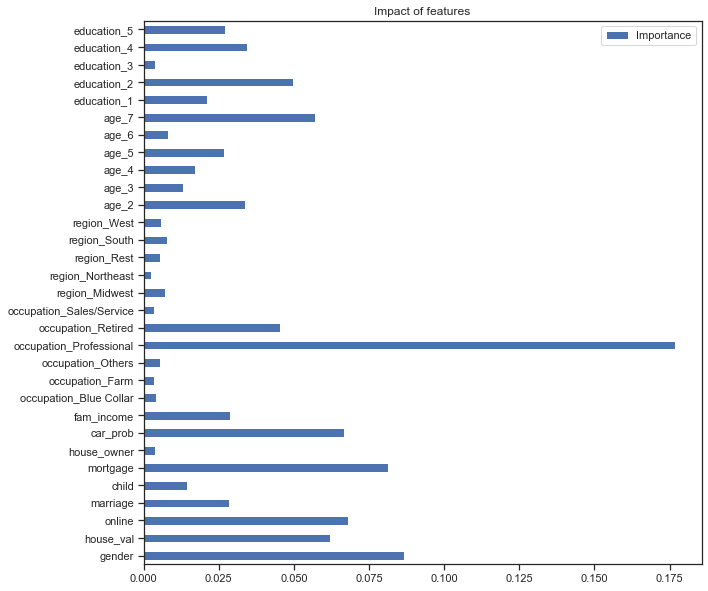

In [48]:
df2 = df.drop('flag', axis=1)
df2 = pd.DataFrame({'Importance': importance}, index=df2.columns)
df2.plot(kind='barh', title="Impact of features",figsize=(10,10))

### For Example See Occupation Professional Impact


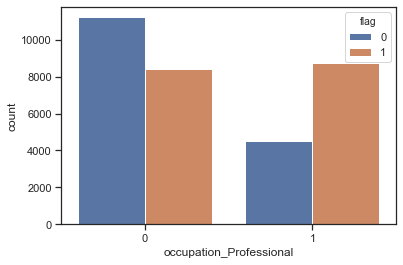

In [49]:
sns.countplot(x='occupation_Professional',hue='flag',data=df)

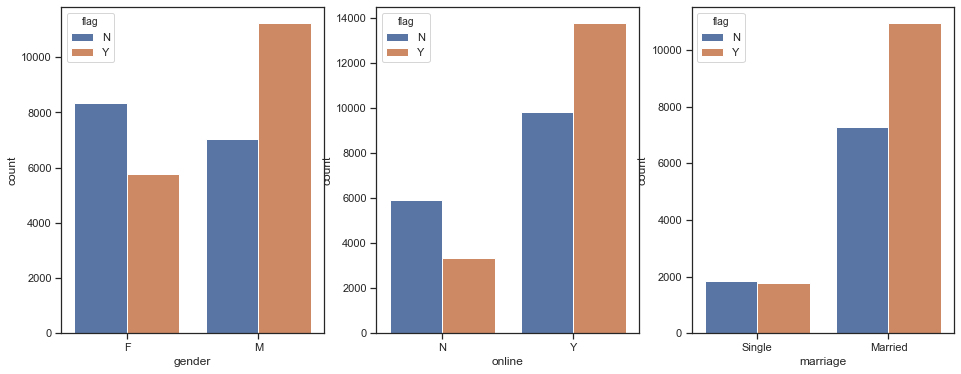

In [50]:
f,ax=plt.subplots(1,3,figsize=(16,6))
sns.countplot(x='gender',hue='flag',data=main_df,ax=ax[0])
sns.countplot(x='online',hue='flag',data=main_df,ax=ax[1])
sns.countplot(x='marriage',hue='flag',data=main_df,ax=ax[2])

In [51]:
import shap
shap.initjs()

# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(xgbmodel)
shap_values = explainer.shap_values(X_train)

ModuleNotFoundError: No module named 'shap'

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
# For Example Imact of car_prob
sns.countplot(x='car_prob',hue='flag',data=df)

In [ ]:
X_output = X_test.copy()

# Randomly pick some observations
random_picks = np.arange(1,9000,10) # Every 10 rows of 9000 rows of test_set
S = X_output.iloc[random_picks]

In [ ]:
def shap_plot(j,model):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model, S)
    return(p)

shap_plot(0, xgbmodel)

# Second Approach

# Handle missing values using clustering:
در این روش برای انتخاب جایگزین مناسب مقادیر نامشخص، ابتدا روی تمام داده ها خوشه بندی انجام می دهیم و سپس در هر خوشه مقادیر نامشخص هر یک از ویژگی ها را با مقدار پرتکرار آن ویژگی در همان خوشه جایگزین می کنیم

### Find best k for KMeans clustering

In [ ]:
sqaured_error =[] 
for i in range(1, 20): 
    KM = KMeans(n_clusters = i, max_iter = 100) 
    KM.fit(temp_df) 
    sqaured_error.append(KM.inertia_)      
  
plt.plot(range(1, 20), sqaured_error, color ='r', linewidth ='3') 
plt.xlabel("K") 
plt.ylabel("Sqaured Error") 
plt.show()

### Clustering data with kmeans

In [ ]:
numOfClusters = 3
KM = KMeans(n_clusters = numOfClusters, max_iter = 100) 
KM.fit(temp_df.drop("index", 1))

In [ ]:
dfs=[]
for i in range(numOfClusters):
    dfs.append(pd.DataFrame())

In [ ]:
for i in range(len(temp_df)):
    dfs[KM.labels_[i]]= dfs[KM.labels_[i]].append(temp_df.iloc[i])

In [ ]:
for i in range (numOfClusters):
    print(dfs[i].shape)

In [ ]:
cluster_mod =[[None for x in range(dfs[0].shape[1])] for y in range(numOfClusters)]

In [ ]:
attrs = temp_df.columns.values

In [ ]:
for i in range(numOfClusters):
    for j, attr in enumerate(attrs):
        if(attr != "house_val" ):
            cluster_mod[i][j]=dfs[i][attr].mode()

In [ ]:
nullable_df = main_df[main_df.isnull().any(axis=1)]

In [ ]:
nullable_df

## Fill null values with cluster labels
بعد از خوشه بندی مقادیر نامشخص در داده های خام اصلی را با مقادیر جدید جایگزین می کنیم

In [ ]:
for i in range(len(nullable_df)):
    index = nullable_df.iloc[i][0]
    for j in range(len(nullable_df.iloc[i])):
        if str(nullable_df.iloc[i][j])=="nan":
            temp_df.at[index,attrs[j]] = cluster_mod[KM.labels_[index]][j]

In [ ]:
temp_df

مشابه قبل عمل کلاسبندی را انجام می دهیم
## Splitting Train and Test Set

In [ ]:
df=temp_df.drop("index",1).copy()

In [ ]:
X = df.drop('flag', axis=1)
y = df['flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# scale to handle imbalanced dataset
scale = y_train[y_train == 0].count() / y_train[y_train == 1].count()

## Some Classifications

In [ ]:
lr = LogisticRegression(C=1, solver='lbfgs')
clf = SVC(kernel='rbf', gamma='auto')
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
rfc = RandomForestClassifier(n_estimators=40)
svm_clf = Pipeline([("poly_features" , PolynomialFeatures(degree=2) ) , ( "scaler" , StandardScaler() ) , ("svm_clf" , LinearSVC(C=1, loss="hinge"))] ) 
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1) , n_estimators=400, algorithm="SAMME.R" , learning_rate=0.01)

classification_list = [lr, clf, dtree, rfc, svm_clf, ada_clf]

def scorer(class_list):
    for every in (class_list):
        every.fit(X_train,y_train)
        print (every.__class__.__name__, 'F1 score =', f1_score(y_test,every.predict(X_test)))
scorer (classification_list)

## XGBOOST

In [ ]:
xgbmodel = XGBClassifier(max_depth=3, learning_rate=0.02, n_estimators=800, scale_pos_weight=scale)
xgbmodel.fit(X_train, y_train)
y_pred_test = xgbmodel.predict(X_test)

print('F1 Score: {:.2f}%'.format(f1_score(y_test, y_pred_test)*100))

In [ ]:
import shap
shap.initjs()

# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(xgbmodel)
shap_values = explainer.shap_values(X_train)

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
# For Example Imact of car_prob
sns.countplot(x='car_prob',hue='flag',data=df)

In [ ]:
X_output = X_test.copy()

# Randomly pick some observations
random_picks = np.arange(1,9000,10) # Every 10 rows of 9000 rows of test_set
S = X_output.iloc[random_picks]

In [ ]:
def shap_plot(j,model):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model, S)
    return(p)

shap_plot(0, xgbmodel)

# Conclusion
بر اساس نتایج به دست آمده می توانیم مشاهده کنیم که افراد دارای ویژگی هایی با مقادیر زیر می تواند انتخاب مناسبی برای هدف تبلیغات ما باشد.
## To target people we consider these values of features:

### 1- Gender: Male
### 2- Online Experience
### 3- High House Value
### 4- Occupation: Professional
### 5- car prob: Low